In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [3]:
def load_data(path):
    """
    Load the training data
    
    """
    # data = pd.read_csv(r'C:\Users\Gor\Desktop\ALL.txt', header=None, sep=';')
    data = pd.read_csv(path, header=None, sep=',')
    data = data.drop_duplicates()
    data = data.sample(frac = 1)
    data = data.reset_index(drop=True)
    data = data[:300000]
    data.columns = ['1', '2', '3', '4', '5', 'MA_col1', 'MA_col2', 'MA_col3', 'MA_col4', 'MA_col5']
    # data = data.drop('sum', axis=1)
    
    return data[['1', '2', '3', '4', '5', 'MA_col1', 'MA_col2', 'MA_col3', 'MA_col4', 'MA_col5']]

def load_data_test(path):
    """
    Load the testing data (HT clean and HT contaminated)
    
    """
    # data = pd.read_csv(r'C:\Users\Gor\Desktop\ALL.txt', header=None, sep=';')
    data = pd.read_csv(path, header=None, sep=',')
    data = data.sample(frac = 1)
    data = data.reset_index(drop=True)
    data = data[:25000]
    # data.columns = ['1', '2', '3', '4', '5', 'label']
    data.columns = ['1', '2', '3', '4', '5', 'MA_col1', 'MA_col2', 'MA_col3', 'MA_col4', 'MA_col5']
    # data = data.drop('sum', axis=1)
    # data = data.drop_duplicates()
    return data[['1', '2', '3', '4', '5', 'MA_col1', 'MA_col2', 'MA_col3', 'MA_col4', 'MA_col5']]

In [4]:
#train_file_path = r'C:\Users\Gor\Desktop\New_experiments\virus_detection\data\x_train.txt'
train_file_path = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\new_DATA\Split_into_train_test\HT3_3\4\my_training_data.txt'
train_data = load_data(train_file_path)

#test_file_path = r'C:\Users\Gor\Desktop\New_experiments\virus_detection\data\x_test_HTfree.txt'
test_file_path = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\new_DATA\Split_into_train_test\HT3_3\4\my_testing_data.txt'
test_data = load_data_test(test_file_path)

trojan_file_path = r'C:\Users\Gor\Desktop\New_experiments\Important_files-3\new_DATA\Split_into_train_test\HT3_3\4\my_trojan_data.txt'
trojan_data = load_data_test(trojan_file_path)

In [5]:
train_data

,1,2,3,4,5,MA_col1,MA_col2,MA_col3,MA_col4,MA_col5
0,12.8,39.2,266.4,6.4,8.0,11.68,42.40,265.92,8.00,6.08
1,47.2,10.4,262.4,32.8,4.0,46.08,9.12,266.08,39.20,6.24
2,43.2,44.8,268.8,5.6,40.8,43.20,39.36,267.20,7.52,35.84
3,43.2,41.6,264.8,8.0,6.4,45.28,41.44,266.08,7.04,6.88
4,12.0,10.4,268.8,8.0,45.6,10.88,8.96,265.60,7.36,36.48
...,...,...,...,...,...,...,...,...,...,...
299995,14.4,39.2,263.2,5.6,28.8,12.48,39.52,265.92,7.36,36.64
299996,12.8,41.6,260.8,6.4,5.6,10.88,40.32,263.52,7.20,6.08
299997,10.4,47.2,264.8,5.6,5.6,11.20,41.76,265.92,7.36,5.76
299998,43.2,8.0,268.8,6.4,30.4,44.64,8.96,265.92,7.84,36.48


In [6]:
xx, yy = np.meshgrid(np.linspace(-10, 150, 1000), np.linspace(-10, 150, 1000))


# Generate train data
X_train = np.r_[train_data]
n_train_rows, n_train_columns = X_train.shape


# Generate some regular novel observations
X_test = np.r_[test_data]
n_test_rows, test_columns = X_test.shape


# Generate some abnormal novel observations

# # X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
# X_HT = np.random.uniform(low=10, high=15, size=(75000, 1))
# index = np.random.randint(n_test_rows, size=75000)
# #X_outliers = np.r_[X_test[index, :] + X_HT]
# X_outliers1 = X_test[index, 0:1] + X_HT
# X_outliers2 = X_test[index, 1:5]
# X_outliers = np.append(X_outliers1, X_outliers2, axis=1)

X_outliers = np.r_[trojan_data]
n_outliers_rows, outliers_columns = X_outliers.shape

### Quick visualisation of the datapoints

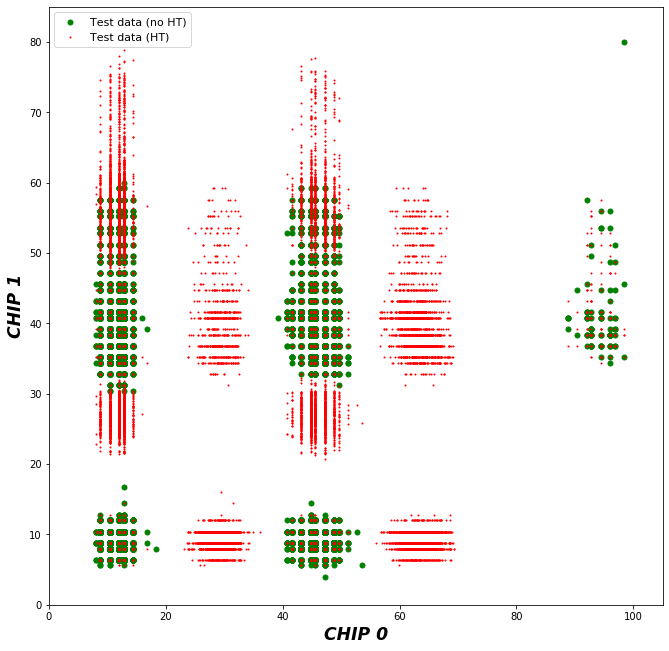

In [7]:
plt.figure(figsize=(11,11))

column1 = 0
column2 = 1

noHT = plt.scatter(X_test[:, column1], X_test[:, column2], c='green', s=25, edgecolors='green')
HT = plt.scatter(X_outliers[:, column1], X_outliers[:, column2], c='red', s=1, edgecolors='red')

plt.axis('tight')
plt.xlim((0, 105))
plt.ylim((0, 85))

plt.legend([noHT, HT], ["Test data (no HT)", "Test data (HT)"], loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))

# plt.xlabel(
#     "Errors train: %d/%d ; "
#     "Errors novel regular: %d/%d ; "
#     "Errors novel abnormal: %d/%d"
#     % (n_error_train, n_train_rows ,n_error_test, n_test_rows, n_error_outliers, n_outliers_rows))
plt.xlabel("CHIP {}".format(column1), fontsize='xx-large', fontstyle='oblique', fontweight='bold')
plt.ylabel("CHIP {}".format(column2), fontsize='xx-large', fontstyle='oblique', fontweight='bold')

plt.show()

#### Prepare the data

In [8]:
y_test = np.ones((25000,1), dtype='int')
y_outliers = np.negative(np.ones((25000,1), dtype='int'))
y_test_comined = np.vstack((y_test,y_outliers))
X_test_comined = np.vstack((X_test,X_outliers))
full_test_data = np.hstack((X_test_comined, y_test_comined))
np.random.shuffle(full_test_data)
y_test_comined = full_test_data[:,-1].reshape(50000,1)
X_test_comined = full_test_data[:,0:-1]

print(y_test.shape)
print(y_outliers.shape)
print(y_test_comined.shape)
print()
print(X_test.shape)
print(X_outliers.shape)
print(full_test_data.shape)

(25000, 1)
(25000, 1)
(50000, 1)

(25000, 10)
(25000, 10)
(50000, 11)


### Scaling the data..........actually worsened the results

In [9]:
# from sklearn.preprocessing import MinMaxScaler
# #Scaling
# # Column_names = X.columns
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train =scaler.transform(X_train)
# X_test_comined = data=scaler.transform(X_test_comined)


In [10]:
x = datetime.datetime.now()
trojan_name = 'HT3_3 - 4'

#Initiate all the files

Results_file = open("dump_RESULTS.txt", "a")
Results_file.write("\n\nNew occurence at: {}, Trojan name: {} \n\nkernel , nu   , gamma   ,    Accuracy,    F1_score,    Recall,   Precision,   No_Sup_Vec, TP   , FN   , FP   , TN \n".format(x, trojan_name))
# Results_file.write("\n\nNew occurence at: {}, Trojan name: {} \n\nkernel , nu   , gamma,   Accuracy,   F1_score,  Recall,  Precision,   No_Sup_Vec \n".format(x, trojan_name))
Results_file.close()
# nu_list_file =  open("nu_list_file.txt", "a")
# nu_list_file.write("\n\nNew occurence at: {}, Trojan name: {} \nnu_list = np.array([".format(x, trojan_name))
# nu_list_file.close()
# gamma_list_file =  open("gamma_list_file.txt", "a")
# gamma_list_file.write("\n\nNew occurence at: {}, Trojan name: {} \ngamma_list = np.array([".format(x, trojan_name))
# gamma_list_file.close()
# F1_score_file =  open("F1_score_file.txt", "a")
# F1_score_file.write("\n\nNew occurence at: {}, Trojan name: {} \nF1_score_list = np.array([".format(x, trojan_name))
# F1_score_file.close()
# Accuracy_score_file =  open("Accuracy_score_file.txt", "a")
# Accuracy_score_file.write("\n\nNew occurence at: {}, Trojan name: {} \nAccuracy_score_list = np.array([".format(x, trojan_name))
# Accuracy_score_file.close()
# Recall_file =  open("Recall_file.txt", "a")
# Recall_file.write("\n\nNew occurence at: {}, Trojan name: {} \nRecall_list = np.array([".format(x, trojan_name))
# Recall_file.close()
# Precision_file =  open("Precision_file.txt", "a")
# Precision_file.write("\n\nNew occurence at: {}, Trojan name: {} \nPrecision_list = np.array([".format(x, trojan_name))
# Precision_file.close()
# No_Sup_Vec_file =  open("No_Sup_Vec_file.txt", "a")
# No_Sup_Vec_file.write("\n\nNew occurence at: {}, Trojan name: {} \nNo_Sup_Vec = np.array([".format(x, trojan_name))
# No_Sup_Vec_file.close()

In [11]:
# nu_list = np.arange(0.0001, 0.00350001, 0.0002)
# gamma_list = np.arange(0.001, 0.030, 0.002)

# nu_list = np.arange(0.005, 0.0160001, 0.0025)
# gamma_list = np.arange(0.001, 0.0110001, 0.0025)

nu_list = [0.01]
gamma_list = [0.0085]

best_F1_score = 0
kf_train = KFold(n_splits=5, shuffle=True, random_state=78)
kf_train.get_n_splits(X_train)
train_indexes = [ o for _ , o in kf_train.split(X_train)]

kf_test = KFold(n_splits=10, shuffle=True, random_state=78)
kf_test.get_n_splits(X_test_comined)
test_indexes = [ o for _ , o in kf_test.split(X_test_comined)]


print("Beginning the training...\n")
for nu in nu_list:
    
#     nu_list_file =  open("nu_list_file.txt", "a")
#     nu_list_file.write("\n")
#     nu_list_file.close()
#     gamma_list_file =  open("gamma_list_file.txt", "a")
#     gamma_list_file.write("\n")
#     gamma_list_file.close()
#     F1_score_file =  open("F1_score_file.txt", "a")
#     F1_score_file.write("\n(")
#     F1_score_file.close()
#     Accuracy_score_file =  open("Accuracy_score_file.txt", "a")
#     Accuracy_score_file.write("\n(")
#     Accuracy_score_file.close()
#     Recall_file =  open("Recall_file.txt", "a")
#     Recall_file.write("\n(")
#     Recall_file.close()
#     Precision_file =  open("Precision_file.txt", "a")
#     Precision_file.write("\n(")
#     Precision_file.close()
#     No_Sup_Vec_file =  open("No_Sup_Vec_file.txt", "a")
#     No_Sup_Vec_file.write("\n(")
#     No_Sup_Vec_file.close()
    
    for gamma in gamma_list:
        
        
        Precisions = np.array([])
        Recalls    = np.array([])
        F1_scores = np.array([])
        Accuracies = np.array([])
        num_of_support_vectors_list = np.array([])
        
        for trn_idx, tst_idx in zip(train_indexes, test_indexes): # Do KFold cross-validation
            
            ###################### # fit the model

            # nu=0.01
            # gamma=0.05
            kernel = "rbf"
            clf = svm.OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
            clf.fit(X_train[trn_idx,:])

#             ###################### # predict

#             y_pred_train = clf.predict(X_train)
#             y_pred_test = clf.predict(X_test)
#             y_pred_outliers = clf.predict(X_outliers)

#             ###################### # store some values
#             n_error_train = y_pred_train[y_pred_train == -1].size
#             n_correct_test = y_pred_test[y_pred_test == 1].size
#             n_error_test = y_pred_test[y_pred_test == -1].size
#             n_correct_outliers = y_pred_outliers[y_pred_outliers == -1].size
#             n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

#             ###################### # calculate the metrics 
#             TP = n_correct_test
#             FN = n_error_test
#             FP = n_error_outliers
#             TN = n_correct_outliers

    
            y_pred_combined = clf.predict(X_test_comined[tst_idx,:]).reshape(-1,1)

            Precision = precision_score(y_test_comined[tst_idx,:], y_pred_combined)
            Recall    = recall_score(y_test_comined[tst_idx,:], y_pred_combined)
            F1_score  = f1_score(y_test_comined[tst_idx,:], y_pred_combined)
            Accuracy  = accuracy_score(y_test_comined[tst_idx,:], y_pred_combined)
            num_of_support_vectors = clf.support_vectors_.shape[0]
            
            
            # Append values in arrays to take the average at a later step
            
            Precisions = np.append(Precisions, Precision)
            Recalls    = np.append(Recalls, Recall)
            F1_scores  = np.append(F1_scores, F1_score)
            Accuracies = np.append(Accuracies, Accuracy)
            num_of_support_vectors_list = np.append(num_of_support_vectors_list, num_of_support_vectors)
        
        ###################### # take the average of metrics generated from KFold cross-validation
        Precision = round(np.mean(Precisions),5)
        Recall    = round(np.mean(Recalls),5)
        F1_score  = round(np.mean(F1_scores),5)
        print(F1_scores)
        print(F1_score)
        Accuracy  = round(np.mean(Accuracies),5)
        num_of_support_vectors = round(np.mean(num_of_support_vectors_list))
        ###################### # store the parameters for the best F1 score
        
        if F1_score > best_F1_score:
            nu_best = nu
            gamma_best = gamma
            best_F1_score = F1_score
        
        
        TN, FP, FN, TP = confusion_matrix(y_test_comined, clf.predict(X_test_comined).reshape(-1,1)).ravel()

        
        ###################### # Record the generated data for later use
        Results_file = open("dump_RESULTS.txt", "a")
        Results_file.write("{}  , {}  , {}  ,  {}  , {}  , {}  , {}  , {}  ,  {}   , {}  , {}  , {}\n".format(kernel, round(nu, 5),
                                                                                                              round(gamma, 5), Accuracy,
                                                                                                              F1_score, Recall, Precision,
                                                                                                              num_of_support_vectors,
                                                                                                              TP, FN, FP, TN))
#         Results_file.write("{}  , {}  , {}  ,  {}  , {}  , {}  , {}  , {} \n".format(kernel, round(nu, 5),
#                                                                                      round(gamma, 5), Accuracy,
#                                                                                      F1_score, Recall, Precision,
#                                                                                      num_of_support_vectors))
        Results_file.close()
        
#         nu_list_file =  open("nu_list_file.txt", "a")
#         nu_list_file.write(", {}".format(round(nu, 5)))
#         nu_list_file.close()
#         gamma_list_file =  open("gamma_list_file.txt", "a")
#         gamma_list_file.write(", {}".format(round(gamma, 5)))
#         gamma_list_file.close()        
#         F1_score_file =  open("F1_score_file.txt", "a")
#         F1_score_file.write(", {}".format(F1_score))
#         F1_score_file.close()
#         Accuracy_score_file =  open("Accuracy_score_file.txt", "a")
#         Accuracy_score_file.write(", {}".format(Accuracy))
#         Accuracy_score_file.close()
#         Recall_file =  open("Recall_file.txt", "a")
#         Recall_file.write(", {}".format(Recall))
#         Recall_file.close()
#         Precision_file =  open("Precision_file.txt", "a")
#         Precision_file.write(", {}".format(Precision))
#         Precision_file.close()
#         No_Sup_Vec_file =  open("No_Sup_Vec_file.txt", "a")
#         No_Sup_Vec_file.write(", {}".format(num_of_support_vectors))
#         No_Sup_Vec_file.close()
        print(" ... ")
        
        
        
        
#     F1_score_file =  open("F1_score_file.txt", "a")
#     F1_score_file.write("),")
#     F1_score_file.close()
#     Accuracy_score_file =  open("Accuracy_score_file.txt", "a")
#     Accuracy_score_file.write("),")
#     Accuracy_score_file.close()
#     Recall_file =  open("Recall_file.txt", "a")
#     Recall_file.write("),")
#     Recall_file.close()
#     Precision_file =  open("Precision_file.txt", "a")
#     Precision_file.write("),")
#     Precision_file.close()
#     No_Sup_Vec_file =  open("No_Sup_Vec_file.txt", "a")
#     No_Sup_Vec_file.write("),")
#     No_Sup_Vec_file.close()        
        
    print("\n")
    
# nu_list_file =  open("nu_list_file.txt", "a")
# nu_list_file.write("])")
# nu_list_file.close()
# gamma_list_file =  open("gamma_list_file.txt", "a")
# gamma_list_file.write("])")
# gamma_list_file.close()
# F1_score_file =  open("F1_score_file.txt", "a")
# F1_score_file.write("])")
# F1_score_file.close()
# Accuracy_score_file =  open("Accuracy_score_file.txt", "a")
# Accuracy_score_file.write("])")
# Accuracy_score_file.close()
# Recall_file =  open("Recall_file.txt", "a")
# Recall_file.write("])")
# Recall_file.close()
# Precision_file =  open("Precision_file.txt", "a")
# Precision_file.write("])")
# Precision_file.close()
# No_Sup_Vec_file =  open("No_Sup_Vec_file.txt", "a")
# No_Sup_Vec_file.write("])")
# No_Sup_Vec_file.close() 

Beginning the training...

[0.97989249 0.98201439 0.97932712 0.97996858 0.98110932]
0.98046
 ... 




In [12]:
Results_file = open("dump_RESULTS.txt", "a")
Results_file.write("\nTrojan name: {} ==> Best params: nu = {}  , gamma = {}  , F1_score = {}  \n".format(trojan_name, 
                                                                                                          round(nu_best, 5),
                                                                                                          round(gamma_best, 5),
                                                                                                          best_F1_score))
Results_file.close()
        
print(best_F1_score)
print(nu_best, gamma_best)

0.98046
0.01 0.0085


In [13]:
# # plot the line, the points, and the nearest vectors to the plane

# Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.figure(figsize=(14,14))
# plt.title("Novelty Detection")
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
# a = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='orange')
# plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# s = 30
# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=70, edgecolors='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=10, edgecolors='green')
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=s, edgecolors='red')
# plt.axis('tight')
# plt.xlim((-10, 150))
# plt.ylim((-10, 150))

# plt.legend([a.collections[0], b1, b2, c],
#            ["learned frontier", "training obs.",
#             "new regular obs.", "new abnormal obs."],
#            loc="upper left",
#            prop=matplotlib.font_manager.FontProperties(size=11))
# plt.xlabel(
#     "Errors train: %d/%d ; "
#     "Errors novel regular: %d/%d ; "
#     "Errors novel abnormal: %d/%d"
#     % (n_error_train, n_train_rows ,n_error_test, n_test_rows, n_error_outliers, n_outliers_rows))

# plt.show()

# Best fit and predict

In [14]:
# fit the model

# nu=0.0001
# gamma=0.004
nu = nu_best
gamma = gamma_best
kernel = "rbf"
clf = svm.OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
y_pred_combined = clf.predict(X_test_comined).reshape(-1,1)
F1_score  = f1_score(y_test_comined, y_pred_combined)

print(nu_best, gamma_best)
print(F1_score)
print(clf.support_vectors_.shape)

KeyboardInterrupt: 

# Calculate the scores (manually)

In [ ]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_correct_test = y_pred_test[y_pred_test == 1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_correct_outliers = y_pred_outliers[y_pred_outliers == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
######################
TP = n_correct_test
FN = n_error_test
FP = n_error_outliers
TN = n_correct_outliers

TPR = round(100 - (n_error_test/y_pred_test.size)*100, 5)
FNR = round((n_error_test/y_pred_test.size)*100, 5)
FPR = round((n_error_outliers/y_pred_outliers.size)*100, 5)
TNR = round(100 - (n_error_outliers/y_pred_outliers.size)*100, 5)
Precision = round(n_correct_test/(n_correct_test+n_error_outliers), 3)
Recall = round(n_correct_test/(n_correct_test+n_error_test), 3)
F1_score = round(2*Precision*Recall/(Precision+Recall), 3)
        
num_of_support_vectors = clf.support_vectors_.shape[0]
######################
print('\n TP = {},\n FN = {},\n FP = {},\n TN = {}'.format(TP, FN, FP, TN))
print('\n F1_score = {},\n Recall = {},\n Precision = {},\n Number Sup. Vec. = {}'.format(F1_score, Recall,
                                                                                           Precision, num_of_support_vectors))

In [ ]:
print(clf.support_vectors_.shape[0])
print(clf.n_support_)

# Calculate the scores (from Scikit learn metrics)

#### Prepare the data

In [ ]:
y_test = np.ones((5000,1), dtype='int')
y_outliers = np.negative(np.ones((5000,1), dtype='int'))
y_test_comined = np.vstack((y_test,y_outliers))

X_test_comined = np.vstack((X_test,X_outliers))



y_pred_combined = clf.predict(X_test_comined)
y_pred_combined = y_pred_combined.reshape(10000,1)

#### Print out the scores using Scikit lib

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# print(confusion_matrix(y_test_comined, y_pred_combined))
tn, fp, fn, tp = confusion_matrix(y_test_comined, y_pred_combined).ravel()
print(tp,fn,fp,tn, sep='\n')

In [ ]:
accuracy_score(y_test_comined, y_pred_combined)

In [ ]:
f1_score(y_test_comined, y_pred_combined)

In [ ]:
print(nu_best, gamma_best, sep='\n')

## _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [ ]:
clf.support_vectors_.shape

In [ ]:
# from sklearn.model_selection import KFold
# X = np.ones((30, 5))
# y = np.ones((30, 1))
# kf = KFold(n_splits=5)
# kf.get_n_splits(X)

# print(kf)

# for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index)
#     print("TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     print()
    
# AAA = [ o for _ , o in kf.split(X) ]
# for arr1, arr2  in zip(AAA, AAA):
#     print(arr1)
#     print(arr2)